# Capstone Project - The Battle of Neighborhoods

## 1. Introduction -  Business Problem and Describe the Data:

<font size ="3">
    
**1.1 Introduction:**
    
New York, is the most populous state in the United States. It is diverse and is the financial capital of USA. It is multicultural with 19.45 million people. New York welcomed a record of 65.2 million visitors, comprising 51.6 million domestic and 13.5 million international visitors in 2019. 

It provides lot of business opportunities and business friendly environment. One of the most immigrant-friendly cities in New York is Queens , this city has a lot of immigrants from all over the world with many cultural diversity which allowing a huge types of cuisines one can offer in the restaurant business.
    
Queens Population by Race: 
    
|                   Race                     | Population   | Percentage  |
|:------------------------------------------:|:------------:|:-----------:|
| Whit                                       | 896,722      | 39.01%      |
| Asian                                      | 580,709      | 25.26%      |
| Black or African American                  | 421,038      | 18.32%      |
| Some Other Race                            | 309,236      | 13.45%      |
| Two or More Races                          | 79,731       | 3.47%       |
| American Indian an Alaska Native           | 9,977        | 0.43%       |
| Native Hawaiian and Other Pacific Islander | 1,100        | 0.05%       |

**1.2 Business Problem:**
    
As it is highly developed city so cost of doing business is also one of the highest. Thus, any new business venture or expansion needs to be analyzed carefully. The insights derived from analysis will give good understanding of the business environment which help in strategically targeting the market. This will help in reduction of risk and the return on investment will be reasonable. So in this project we will analyze the neighborhoods in Queens to identify the most profitable area to start the business to make sure whether it is a profitable idea or not. If so, where we can place it?
</font>



<font size = '3'>
    
**1.3 Data Description:**

To Identify the best location to start the business in Queens, I need to find out the number of our competitors in each neighborhoods in Queens.

* I used NY Open-Data to import the data of "Neighborhoods in New York.
    
https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas-NTA-/cpf4-rkhq
    
    
I used Foursquare API to get the most common venues of given Borough of Queens and the Indian restaurants Id.

https://foursquare.com/ 
    
I used Google API to find their geographic coordinates based on their postal code addresses.

</font>


## 2. Methodology:

### 2.1 Import required Libraries:

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
from pprint import pprint # data pretty printer

import requests # library to handle requests
from bs4 import BeautifulSoup  # library to handle web scraping

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # map rendering library

import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors # Matplotlib and associated plotting modules

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from collections import Counter # count occurrences 

from sklearn.cluster import KMeans # import k-means from clustering stage

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('All required Libraries imported')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done
All required Libraries imported

# All requested packages already installed.



### 2.2 Read and Explore New York City Dataset:

In [2]:
# Read Data 
df = pd.read_csv("NYC_Data.csv")
df.head()

,Latitude,Longitude,OBJECTID,Name,Stacked,AnnoLine1,AnnoLine2,AnnoLine3,AnnoAngle,Borough
0,40.894705,-73.847201,1,Wakefield,1,Wakefield,NaN,NaN,0,Bronx
1,40.874294,-73.829939,2,Co-op; City,2,Co-op,City,NaN,0,Bronx
2,40.887556,-73.827806,3,Eastchester,1,Eastchester,NaN,NaN,0,Bronx
3,40.895437,-73.905643,4,Fieldston,1,Fieldston,NaN,NaN,0,Bronx
4,40.890834,-73.912585,5,Riverdale,1,Riverdale,NaN,NaN,0,Bronx


In [3]:
# Clean the data by drop unnecessary Columns 
NYC_df = df.drop(columns = ['OBJECTID', 'Stacked', 'AnnoLine1', 'AnnoLine2', 'AnnoLine3', 'AnnoAngle'])
NYC_df = df[['Borough', 'Name', 'Latitude', 'Longitude']]
NYC_df = NYC_df.rename(columns={'Name': 'Neighborhood'}) # Rename 'Name' column to 'Neighborhood'
NYC_df.reset_index(drop=True, inplace=True) # reset index 

NYC_df.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op; City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [4]:
# returen the numbers of columns and rows 
NYC_df.shape

(299, 4)

### 2.3 Create a map of New York with neighborhoods:

In [5]:
address = 'New York City, NY'
location = None

# define an instance of the geocoder -> ny_explorer
while location == None:
    try:
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
    except:
        pass
print("latitude: ", latitude, " & longitude:" ,longitude)

latitude:  40.7127281  & longitude: -74.0060152


In [6]:
# Create Queens dataframe
Queens_df = NYC_df[NYC_df['Borough'] == 'Queens'].reset_index(drop=True)
Queens_df.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson; Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard; Beach,40.654225,-73.838138


In [7]:
# create map of Queens, New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Queens_df['Latitude'], Queens_df['Longitude'], Queens_df['Borough'], Queens_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#0000ff',
        fill=True,
        fill_color='#00ffff',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

####  Define Foursquare Credentials and Version:

In [8]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'XVIO2U0L5OKUZGLG0FRMDU5PN0EKATU3HT1LBQCKH2BAONFW' 
CLIENT_SECRET = 'DZPRLNMVUUSVD4UGAKJQDEMGKUQX0FTCZFGAMMUQPAMU1HX5' 
VERSION = '20200701'
LIMIT = 5000
radius = 5000 
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XVIO2U0L5OKUZGLG0FRMDU5PN0EKATU3HT1LBQCKH2BAONFW
CLIENT_SECRET:DZPRLNMVUUSVD4UGAKJQDEMGKUQX0FTCZFGAMMUQPAMU1HX5


#### Let's  relevant information for each nearby venue:

In [9]:
import urllib
def getNearbyVenues(names, latitudes, longitudes,limit=100, radius=5000, categoryIds=''):
    try:
        venues_list=[]
        for name, lat, lng in zip(names, latitudes, longitudes):
            #print(name)

            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)

            if (categoryIds != ''):
                url = url + '&categoryId={}'
                url = url.format(categoryIds)

            # make the GET request
            response = requests.get(url).json()
            results = response["response"]['venues']

            # return only relevant information for each nearby venue
            for v in results:
                success = False
                try:
                    category = v['categories'][0]['name']
                    success = True
                except:
                    pass

                if success:
                    venues_list.append([(
                        name, 
                        lat, 
                        lng, 
                        v['name'], 
                        v['location']['lat'], 
                        v['location']['lng'],
                        v['categories'][0]['name']
                    )])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',  
                  'Venue Category']
    
    except:
        print(url)
        print(response)
        print(results)
        print(nearby_venues)

    return(nearby_venues)

### 3. Analysis & Machine Learning

In [10]:
# run the function on each neighborhood and create a new dataframe
Queens_venues = getNearbyVenues(names = Queens_df['Neighborhood'],
                                 latitudes = Queens_df['Latitude'],
                                 longitudes = Queens_df['Longitude']
                                 )

In [11]:
# filter data of Venue Category 
Queens_food_venues = Queens_venues[Queens_venues['Venue Category'].str.contains(r'Food(?!$)', r'Restaurant(?!$)')]
Queens_food_venues.reset_index(drop=True, inplace=True)
Queens_food_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Burger King,40.769464,-73.916434,Fast Food Restaurant
1,Woodside,40.746349,-73.901842,Jollibee,40.745986,-73.901197,Fast Food Restaurant
2,Woodside,40.746349,-73.901842,Tacos y Quesadillas Mexico,40.745604,-73.903135,Food Truck
3,Woodside,40.746349,-73.901842,Tacos El Gallo Giro,40.745848,-73.900752,Food Truck
4,Woodside,40.746349,-73.901842,Bravo Fast Food,40.747410,-73.884148,Fast Food Restaurant


In [12]:
# let's check how many category we have
Queens_food_venues.shape

(109, 7)

In [13]:
# Let's check how many venues were returned for each neighborhood
Queens_food_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Astoria,1,1,1,1,1,1
Auburndale,1,1,1,1,1,1
Bay; Terrace,1,1,1,1,1,1
Bellaire,2,2,2,2,2,2
Belle; Harbor,1,1,1,1,1,1
Bellerose,3,3,3,3,3,3
Briarwood,1,1,1,1,1,1
Broad; Channel,4,4,4,4,4,4
Brookville,2,2,2,2,2,2


### 3.1 Foursquare venues 

In [14]:
# get Indian Restaurant id https://developer.foursquare.com/docs/resources/categories 
#Indian Restaurant = 4bf58dd8d48988d10f941735
NYC_df = NYC_df[NYC_df['Borough'] == 'Queens'].reset_index(drop=True)
newyork_venues_indian = getNearbyVenues(names=NYC_df['Neighborhood'], latitudes=NYC_df['Latitude'], longitudes=NYC_df['Longitude'], radius=1000, categoryIds='4bf58dd8d48988d10f941735')
newyork_venues_indian.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,The Gully,40.766719,-73.912410,Indian Restaurant
1,Astoria,40.768509,-73.915654,Tikka Indian Grill,40.765397,-73.918658,Indian Restaurant
2,Astoria,40.768509,-73.915654,Namaste,40.766669,-73.920784,Indian Restaurant
3,Astoria,40.768509,-73.915654,Mysttik Masaala (Indian Food Truck),40.766437,-73.920462,Food Truck
4,Astoria,40.768509,-73.915654,Mysttik Masaala,40.770163,-73.906086,Food Truck


In [15]:
newyork_venues_indian.shape

(427, 7)

In [16]:
def addToMap(df, color, existingMap):
    for lat, lng, local, venue, venueCat in zip(df['Venue Latitude'], df['Venue Longitude'], df['Neighborhood'], df['Venue'], df['Venue Category']):
        label = '{} ({}) - {}'.format(venue, venueCat, local)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
             color='#0000ff',
            fill=True,
             fill_color='#00ffff',
            fill_opacity=0.7).add_to(existingMap)

In [21]:
map_newyork_indian = folium.Map(location=[latitude, longitude], zoom_start=11)
addToMap(newyork_venues_indian, 'blue', map_newyork_indian)

map_newyork_indian

### 3.2 Analyze Each Neighborhood

In [22]:
# one hot encoding
Queens_onehot = pd.get_dummies(newyork_venues_indian[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Queens_onehot['Neighborhood'] = newyork_venues_indian['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Queens_onehot.columns[-1]] + list(Queens_onehot.columns[:-1])
Queens_onehot = Queens_onehot[fixed_columns]

Queens_onehot.shape

(427, 16)

In [23]:
# Let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
Queens_grouped = Queens_onehot.groupby('Neighborhood').mean().reset_index()
Queens_grouped.head()

,Neighborhood,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Dosa Place,Food Truck,Halal Restaurant,Himalayan Restaurant,Hookah Bar,Indian Chinese Restaurant,Indian Restaurant,Island,Middle Eastern Restaurant,North Indian Restaurant,Snack Place,Tibetan Restaurant
0,Astoria,0.0,0.0,0.0,0.0,0.125000,0.0,0.0,0.0625,0.0,0.812500,0.0,0.0,0.0,0.0,0.0
1,Astoria; Heights,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0000,0.0,0.666667,0.0,0.0,0.0,0.0,0.0
2,Bay; Terrace,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0
3,Bayside,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0
4,Bellaire,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0


#### Let's find out the top 10 food categories in Queens

In [25]:
venue_counts_described = Queens_grouped.describe().transpose()

venue_top10 = venue_counts_described.sort_values('max', ascending=False)[0:10]
venue_top10

,count,mean,std,min,25%,50%,75%,max
Caribbean Restaurant,48.0,0.030382,0.149294,0.0,0.000000,0.000000,0.0,1.000000
Indian Chinese Restaurant,48.0,0.031250,0.159995,0.0,0.000000,0.000000,0.0,1.000000
Indian Restaurant,48.0,0.839561,0.231071,0.0,0.776786,0.912077,1.0,1.000000
North Indian Restaurant,48.0,0.030084,0.085826,0.0,0.000000,0.000000,0.0,0.500000
Food Truck,48.0,0.017981,0.060472,0.0,0.000000,0.000000,0.0,0.333333
Island,48.0,0.006944,0.048113,0.0,0.000000,0.000000,0.0,0.333333
Middle Eastern Restaurant,48.0,0.013393,0.056623,0.0,0.000000,0.000000,0.0,0.333333
Chinese Restaurant,48.0,0.017804,0.046476,0.0,0.000000,0.000000,0.0,0.200000
Hookah Bar,48.0,0.004774,0.025512,0.0,0.000000,0.000000,0.0,0.166667
Asian Restaurant,48.0,0.002342,0.008510,0.0,0.000000,0.000000,0.0,0.047619


In [26]:
#Let's create a new dataframe with indian restaurant and neighborhood  
Queens_ind = Queens_grouped[['Neighborhood', 'Indian Restaurant']]
Queens_ind.set_index(['Neighborhood'], inplace=True)
Queens_ind.head()

,Indian Restaurant
Neighborhood,
Astoria,0.812500
Astoria; Heights,0.666667
Bay; Terrace,1.000000
Bayside,1.000000
Bellaire,1.000000


In [27]:
# merge the data 
merge = pd.merge(Queens_df, Queens_ind, on='Neighborhood')
merge.head()

,Borough,Neighborhood,Latitude,Longitude,Indian Restaurant
0,Queens,Astoria,40.768509,-73.915654,0.812500
1,Queens,Woodside,40.746349,-73.901842,0.893617
2,Queens,Jackson; Heights,40.751981,-73.882821,0.911111
3,Queens,Elmhurst,40.744049,-73.881656,0.914894
4,Queens,Forest; Hills,40.725264,-73.844475,1.000000


####  create the new dataframe and display the top 10 venues for each neighborhood

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
# create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Queens_grouped['Neighborhood']

for ind in np.arange(Queens_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Queens_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Astoria,Indian Restaurant,Food Truck,Hookah Bar,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Himalayan Restaurant
1,Astoria; Heights,Indian Restaurant,Food Truck,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant
2,Bay; Terrace,Indian Restaurant,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant,Halal Restaurant
3,Bayside,Indian Restaurant,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant,Halal Restaurant
4,Bellaire,Indian Restaurant,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant,Halal Restaurant


### 4. Clustering using k-means algorithm:

#### 4.1 Run k-means to count Neighborhoods for each cluster label for variable cluster size

In [30]:
Queens_grouped_clustering = Queens_grouped.drop('Neighborhood', 1)

C:\Users\hanyn\miniconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\hanyn\miniconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\hanyn\miniconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

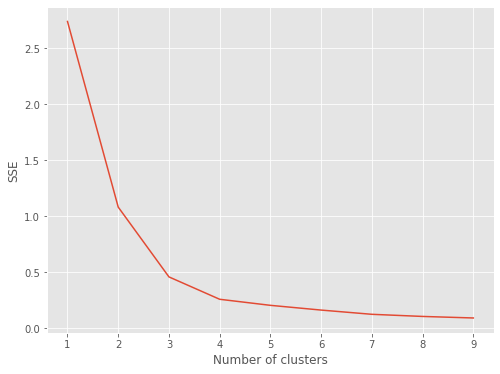

In [31]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
from sklearn.cluster import KMeans

data = merge[['Indian Restaurant', 'Latitude', 'Longitude']]

sse={}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_
    
plt.figure(figsize=(8,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
!conda install -c districtdatalabs yellowbrick --yes

C:\Users\hanyn\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


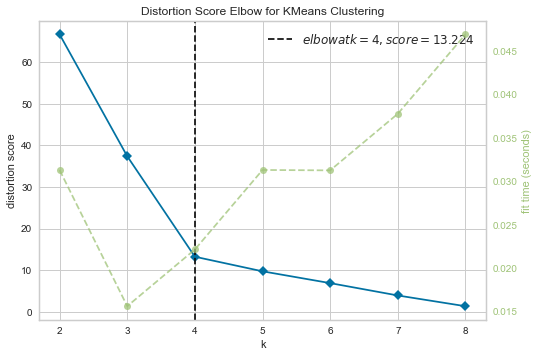

In [32]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,9))

visualizer.fit(data)
visualizer.show()

In [33]:
# set number of clusters
kclusters = 4
#run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters,  random_state=0).fit(Queens_grouped_clustering)
print(Counter(kmeans.labels_))

Counter({3: 35, 0: 10, 1: 2, 2: 1})


In [34]:
# add clustering labels
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
    
neighborhoods_venues_sorted.shape

(48, 12)

In [35]:
neighborhoods_venues_sorted.head(5)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Astoria,Indian Restaurant,Food Truck,Hookah Bar,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Himalayan Restaurant
1,0,Astoria; Heights,Indian Restaurant,Food Truck,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant
2,3,Bay; Terrace,Indian Restaurant,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant,Halal Restaurant
3,3,Bayside,Indian Restaurant,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant,Halal Restaurant
4,3,Bellaire,Indian Restaurant,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant,Halal Restaurant


In [36]:
# merge neighborhoods_venues_sorted with nyc_data to add latitude/longitude for each neighborhood
Queens_merged = neighborhoods_venues_sorted.join(NYC_df.set_index('Neighborhood'), on='Neighborhood')
Queens_merged.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Borough,Latitude,Longitude
0,3,Astoria,Indian Restaurant,Food Truck,Hookah Bar,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Himalayan Restaurant,Queens,40.768509,-73.915654
1,0,Astoria; Heights,Indian Restaurant,Food Truck,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant,Queens,40.770317,-73.894680
2,3,Bay; Terrace,Indian Restaurant,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant,Halal Restaurant,Queens,40.782843,-73.776802
3,3,Bayside,Indian Restaurant,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant,Halal Restaurant,Queens,40.766041,-73.774274
4,3,Bellaire,Indian Restaurant,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant,Halal Restaurant,Queens,40.733014,-73.738892


### 4.2. Result - Analyze clusters - Results:

In [37]:
required_column_indices = [2,3,7]
required_column = [list(Queens_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [2,3,7]

#### 4.2.1. Cluster 1, Label = 0

In [38]:
cluster_0 = Queens_merged.loc[Queens_merged['Cluster Labels'] == 0, Queens_merged.columns[1:12]]
cluster_0.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Astoria; Heights,Indian Restaurant,Food Truck,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant
6,Blissville,Indian Restaurant,North Indian Restaurant,Chinese Restaurant,Tibetan Restaurant,Snack Place,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant
18,Hunters;,Indian Restaurant,North Indian Restaurant,Food Truck,Tibetan Restaurant,Snack Place,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant
26,Long; Island; City,Indian Restaurant,North Indian Restaurant,Food Truck,Tibetan Restaurant,Snack Place,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant
27,Maspeth,North Indian Restaurant,Indian Restaurant,Tibetan Restaurant,Snack Place,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant,Halal Restaurant


In [39]:
for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print("---------------------------------------------")

Indian Restaurant          9
North Indian Restaurant    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
North Indian Restaurant      4
Hookah Bar                   1
Food Truck                   1
Middle Eastern Restaurant    1
Indian Restaurant            1
Caribbean Restaurant         1
Island                       1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Middle Eastern Restaurant    7
Island                       2
North Indian Restaurant      1
Name: 6th Most Common Venue, dtype: int64
---------------------------------------------


#### 4.2.2.  Cluster 2, Label = 1

In [40]:
cluster_1 = Queens_merged.loc[Queens_merged['Cluster Labels'] == 1, Queens_merged.columns[1:12]]
cluster_1.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Kew; Gardens; Hills,Indian Restaurant,Indian Chinese Restaurant,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Hookah Bar,Himalayan Restaurant,Halal Restaurant
31,Pomonok,Indian Chinese Restaurant,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Restaurant,Hookah Bar,Himalayan Restaurant,Halal Restaurant


In [41]:
for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print("---------------------------------------------")

Indian Chinese Restaurant    1
Indian Restaurant            1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Indian Chinese Restaurant    1
Tibetan Restaurant           1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Island                       1
Middle Eastern Restaurant    1
Name: 6th Most Common Venue, dtype: int64
---------------------------------------------


#### 4.2.3.  Cluster 3, Label = 2

In [42]:
cluster_2 = Queens_merged.loc[Queens_merged['Cluster Labels'] == 2, Queens_merged.columns[1:12]]
cluster_2.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
39,South; Jamaica,Caribbean Restaurant,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Restaurant,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant


In [43]:
for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print("---------------------------------------------")

Caribbean Restaurant    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Tibetan Restaurant    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Island    1
Name: 6th Most Common Venue, dtype: int64
---------------------------------------------


#### 4.2.4. Cluster 4, Label = 3

In [44]:
cluster_3 = Queens_merged.loc[Queens_merged['Cluster Labels'] == 3, Queens_merged.columns[1:12]]
cluster_3.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Astoria,Indian Restaurant,Food Truck,Hookah Bar,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Himalayan Restaurant
2,Bay; Terrace,Indian Restaurant,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant,Halal Restaurant
3,Bayside,Indian Restaurant,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant,Halal Restaurant
4,Bellaire,Indian Restaurant,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant,Halal Restaurant
5,Bellerose,Indian Restaurant,Tibetan Restaurant,Snack Place,North Indian Restaurant,Middle Eastern Restaurant,Island,Indian Chinese Restaurant,Hookah Bar,Himalayan Restaurant,Halal Restaurant


In [45]:
for col in required_column:
    print(cluster_3[col].value_counts(ascending = False))
    print("---------------------------------------------")

Indian Restaurant    35
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Tibetan Restaurant           24
Chinese Restaurant            5
Middle Eastern Restaurant     2
Food Truck                    1
Caribbean Restaurant          1
Dosa Place                    1
North Indian Restaurant       1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Island                       24
North Indian Restaurant       6
Middle Eastern Restaurant     4
Asian Restaurant              1
Name: 6th Most Common Venue, dtype: int64
---------------------------------------------


#### 4.2.5 Let's ceate a clusters Map 

In [52]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Queens_merged['Latitude'], Queens_merged['Longitude'], Queens_merged['Neighborhood'], Queens_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Discussion:

<font size ="3">According to this analysis, Kew; Gardens - Hills, Pomonok and South Jamaica borough will provide the least competition for the new upcoming Indian restaurant as there is very little Indian restaurants spread or no Indian restaurants in few neighborhoods.

Kew; Gardens - Hills, Pomonok is the best place to open an Indian restaurants based on the lease competition and Indian population distribution..<font>


## 6. Conclusion:

<font size =3> 
* I have got a chance to work on a business problem with real world data set. I have used many libraries of python to fetch , manipulate and visualize the data. I have also used the foursquare API to focus on the venue details of each neighborhood of Queens. I used NY Open-Data to import the data of "Neighborhoods in New York. and scrapped it for further analysis. For achieving valuable insights, I have applied machine learning algorithms to the scrapped data and to predict the outcome of the business problem.

* Some of the drawbacks of this analysis are — the clustering is completely based only on data obtained from Foursquare API and the data about the Indian population distribution is also not up-to date. Even Though there are lots of areas where it can be improved yet this analysis has certainly provided us with some good insights, preliminary information on possibilities & a head start into this business problem by setting the step stones properly.


* The goals of the project were met and, with some more work, could easily be developed into a fully pledged application that could support the opening a business idea in an unknown location. Hopefully, this project helps acts as initial guidance to take more complex real-life challenges using data-science.<font>